In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import json
%matplotlib inline

In [2]:
data = pd.read_csv('mock_student_data.csv')
df = pd.DataFrame(data, )

Histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd87261d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd87252e6a0>]], dtype=object)

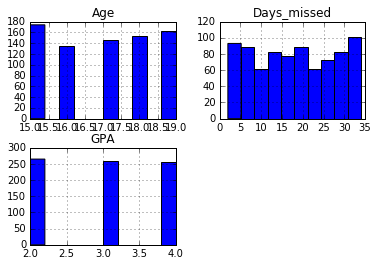

In [34]:
print("Histograms")
df.loc[:, ['Age', 'GPA', 'Days_missed']].hist()

In [11]:
plt.savefig('histogram')

In [33]:
print("Summary Statistics")
df.loc[:, ['Age', 'GPA', 'Days_missed']].describe()

Summary Statistics


,Age,GPA,Days_missed
count,771.000000,779.000000,808.000000
mean,16.996109,2.988447,18.011139
std,1.458067,0.818249,9.629371
min,15.000000,2.000000,2.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,3.000000,18.000000
75%,18.000000,4.000000,27.000000
max,19.000000,4.000000,34.000000


In [35]:
print("Modes")
df.loc[:, ['Age', 'GPA', 'Days_missed']].mode()

Modes


,Age,GPA,Days_missed
0,15.0,2.0,6.0
1,NaN,NaN,14.0
2,NaN,NaN,31.0


In [32]:
print("Missing Data")
(len(df.index)) - df.count()

Missing Data


ID               0
First_name       0
Last_name        0
State          116
Gender         226
Age            229
GPA            221
Days_missed    192
Graduated        0
dtype: int64

In [36]:
def gender_api(first_name):

    webservice_url = "https://api.genderize.io/?name=" + first_name
    gender_data = json.loads(urllib.request.urlopen(webservice_url).read().decode("utf8"))
    return gender_data["gender"]

In [37]:
def genderize(df):

    no_gender = df[df['Gender'].isnull()]['First_name']
    for name in no_gender:
        gender = gender_api(name)

        df.loc[df['Gender'].isnull(),'Gender'] = gender

    df.to_csv('genders_filled_in.csv') 

In [38]:
genderize(df)

In [47]:
def missing_values_means (df):
    age_mean = round((df['Age'].mean()), 1)
    GPA_mean = round((df['GPA'].mean()), 1)
    days_missed_mean = round((df['Days_missed'].mean()), 1)

    print(age_mean)
    print(GPA_mean)
    print(days_missed_mean)
    
    df['Age'].fillna(age_mean, inplace = True)
    df['GPA'].fillna(GPA_mean, inplace = True)
    df['Days_missed'].fillna(days_missed_mean, inplace = True)

    df.to_csv('missing_values_means.csv') 

In [48]:
missing_values_means(df)

17.0
3.0
18.0


In [45]:
def missing_values_cond_means (df):

    graduated = df[df['Graduated'] == 'Yes'][['Age', 'GPA', 'Days_missed']]
    age_cond_mean = round(graduated['Age'].mean(), 1)
    GPA_cond_mean = round(graduated['GPA'].mean(), 1)
    days_missed_cond_mean = round(graduated['Days_missed'].mean(), 1)

    print(age_cond_mean)
    print(GPA_cond_mean)
    print(days_missed_cond_mean)
    
    df['Age'].fillna(age_cond_mean, inplace = True)
    df['GPA'].fillna(GPA_cond_mean, inplace = True)
    df['Days_missed'].fillna(days_missed_cond_mean, inplace = True)

    df.to_csv('missing_values_cond_means.csv')

In [46]:
missing_values_cond_means(df)

17.0
3.3
17.2
